# Profiles of Profitable Apps
### Scenario (fictional)
As an app company, we would like to gain insight on Google Play and Apple App store markets. In particular, we would like to gain insight on the characteristics of successful apps that are free in both markets, to guide our next development. Our goal for this project is to analyze data to help our developers understand what type of apps are likely to attract the most users, and hence bring in the most ad revenue.

### Methodology
A sample of 10,000 Android apps and 7000 Apple apps, collected in 2018, were analysed.

Although Pandas would have offered a cleaner solution, the package wasn't used here in order to practice basic skills in Python.


### Reading the file and examining data

In [1]:
def open_file(file):
    opened_file = open(file)
    from csv import reader
    read_file = reader(opened_file)
    data = list(read_file)
    
    return data
    
    

def explore_data(dataset, start, end, dimensions=False): 
    ''' A function to print parts of the dataset easily'''
    dataset_slice = dataset[start:end]
    cols = len(dataset_slice[0]) #First row as a list
    rows = len(dataset_slice)
    total_rows = len(dataset)
    
    if dimensions:
        print(f'Printing {cols} columns and {rows} out of {total_rows} rows')
        print('\n')
    
    for row in dataset_slice:
        print(row)
        print('\n')
        

In [2]:
apple_dataset = open_file(file='AppleStore.csv')
explore_data(apple_dataset, start=0, end=3, dimensions=True)

android_dataset = open_file('googleplaystore.csv')
explore_data(android_dataset, 0, 3, True)

apple_header = apple_dataset[0]
apple_data = apple_dataset[1:]
android_header = android_dataset[0]
android_data = android_dataset[1:]

Printing 16 columns and 3 out of 7198 rows


['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


Printing 13 columns and 3 out of 10842 rows


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', 

#### Observations
1. Both datasets have header rows
2. Apple data has 16 columns or 'factors', whereas Google play data has a smaller dimension of 13
3. Columns of the datasets do not line up, e.g. Category is in index position 1 and -5 for Google and Apple respectively
4. Unsure what some column headers mean: 'Type' for Google Play Store, and 'vpp_lic', 'ipadSc_urls.num' from Apple dataset. So we look at documentation for [Google Dataset](https://www.kaggle.com/lava18/google-play-store-apps) and [Apple Dataset](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps?select=AppleStore.csv) to check.
5. `Currency` column only has one unique value: 'USD'
6. We'd like to find the features of a successful app, so most relevant columns are likely to be: Category, number of downloads and User Ratings. 
7. There are potentially links between number of supported devices and ratings

## Data Cleaning

For the purposes of this project, we're only looking to examine free english apps. Therefore we want to do the following:
1. Check for and remove any duplicates
2. Remove non-English apps
3. Remove non-free apps
4. Decide how to handle anomalous results

#### Discussion Forum
The [Android Data Discussion Forum](https://www.kaggle.com/lava18/google-play-store-apps/discussion) of the Google Dataset highlights multiple potential errors to focus on. One such error describes a column shift for row number 10472 (without header row), since it is missing `Category`

In [3]:
apple_header = apple_dataset[0]
apple_data = apple_dataset[1:]
android_header = android_dataset[0]
android_data = android_dataset[1:]


In [4]:
print(android_data[10472]) #Indeed incorrect so we delete this entry
print(len(android_data))
del android_data[10472]
print(android_data[10472]) #Check to see deletion at index location
print(len(android_data))

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']
10841
['osmino Wi-Fi: free WiFi', 'TOOLS', '4.2', '134203', '4.1M', '10,000,000+', 'Free', '0', 'Everyone', 'Tools', 'August 7, 2018', '6.06.14', '4.4 and up']
10840


### Duplicate entries
Below we find that Google has 1181 duplicate entries for Google Play Store. We create a frequency table with dictionaries to get an idea of the most common apps, to then assess how some or all of those can be dealt with. 'ROBLOX' has a total of 9 entries. 

Possible ideas instead of removing randomly we could use some of the data to determine which data points to keep.
1. `Reviews` could be used since that doesn't shrink with time. 
2. `current ver` and `ver` columns of Google Play and Apple datasets respectively could be used, but duplicates could be found for the same version
3. At initial glance, `Installs` looked like a good candidate, however in the case of 'Instagram', it simply states '1 billion +'

In [34]:
#We are told there are no duplicates in the Apple dataset, so we focus on Android

android_duplicates = []
android_unique = []

for app in android_data:
    app_name = app[0] #First element of each row
    if app_name in android_unique:
        android_duplicates.append(app_name)
    else:
        android_unique.append(app_name)
        
print(f'There are {len(android_duplicates)} duplicates in Android')




There are 1181 duplicates in Android


#### Examining most frequent duplications

In [10]:
app_frequency = {}

for each_row in android_data:
    app_name = each_row[0]
    if app_name in app_frequency:
        app_frequency[app_name] += 1
    else:
        app_frequency[app_name] = 1
        

In [39]:
#Order the dictionary by length of Values
x = sorted(app_frequency.items(), key=lambda item: item[1], reverse=True)
ordered_app_frequency = {k: v for k, v in x}

In [41]:
#Returns just the first 10 most frequently duplicated apps - 'ROBLOX' appears 9 times
list(ordered_app_frequency.items())[:10]

[('ROBLOX', 9),
 ('CBS Sports App - Scores, News, Stats & Watch Live', 8),
 ('Duolingo: Learn Languages Free', 7),
 ('Candy Crush Saga', 7),
 ('8 Ball Pool', 7),
 ('ESPN', 7),
 ('Nick', 6),
 ('Subway Surfers', 6),
 ('Bubble Shooter', 6),
 ('slither.io', 6)]

In [14]:
for row in android_data:
    app_name = row[0]
    if app_name == 'ROBLOX':
        print(row)
        print('\n')

['ROBLOX', 'GAME', '4.5', '4447388', '67M', '100,000,000+', 'Free', '0', 'Everyone 10+', 'Adventure;Action & Adventure', 'July 31, 2018', '2.347.225742', '4.1 and up']


['ROBLOX', 'GAME', '4.5', '4447346', '67M', '100,000,000+', 'Free', '0', 'Everyone 10+', 'Adventure;Action & Adventure', 'July 31, 2018', '2.347.225742', '4.1 and up']


['ROBLOX', 'GAME', '4.5', '4448791', '67M', '100,000,000+', 'Free', '0', 'Everyone 10+', 'Adventure;Action & Adventure', 'July 31, 2018', '2.347.225742', '4.1 and up']


['ROBLOX', 'GAME', '4.5', '4449882', '67M', '100,000,000+', 'Free', '0', 'Everyone 10+', 'Adventure;Action & Adventure', 'July 31, 2018', '2.347.225742', '4.1 and up']


['ROBLOX', 'GAME', '4.5', '4449910', '67M', '100,000,000+', 'Free', '0', 'Everyone 10+', 'Adventure;Action & Adventure', 'July 31, 2018', '2.347.225742', '4.1 and up']


['ROBLOX', 'FAMILY', '4.5', '4449910', '67M', '100,000,000+', 'Free', '0', 'Everyone 10+', 'Adventure;Action & Adventure', 'July 31, 2018', '2.347.225

#### Removing Duplicates
Notice the only reliable feature that changes (apart from 1 instance) is the length of `Reviews`. We can use this column to keep only the maximum. 

Method 
- Create a dictionary called `reviews_max` which stores only the maximum number of reviews
- Create a new list called `clean_android` where unique apps will be stored
- Loop through `android_data`, and if the number of reviews of the row matches the maximum number of reviews from `reviews_max`, then we append `clean_android`
- Check that the length of `clean_android`, which should be `len(android_data)` minus `len(android_duplicates)` (10840 - 1181 = 9659)

In [26]:
reviews_max = {} #initialise dictionary 
for row in android_data:
    name = row[0]
    n_reviews = float(row[3]) #Number of reviews for each app
    
    if name not in reviews_max:
        reviews_max[name] = n_reviews #Create a new entry in `reviews_max`
        
    elif n_reviews > reviews_max[name]:
        reviews_max[name] = n_reviews   #Updates max number of reviews
        
len(reviews_max) #Should be 9659

9659

In [28]:
clean_android = []

for row in android_data:
    name = row[0]
    n_reviews = float(row[3])

    if n_reviews == reviews_max[name]:
        clean_android.append(row)
        
len(clean_android) #Should be 9659

10054

#### Exploring the Mistake
For an unknown reason, `clean_android` returned length 10054 instead of the expected 9659. 786 duplicates have been removed, but 395 have not. I suspected this may be because some maximum reviews may be duplicated, so we rerun with a check to see if an app has been already added before appending `clean_android`. This returned the expected length of non-duplicated apps. 

In [33]:
clean_android = []
already_added = []

for row in android_data:
    name = row[0]
    n_reviews = float(row[3])

    if n_reviews == reviews_max[name] and name not in already_added:
        clean_android.append(row)
        already_added.append(name)
        
len(clean_android) #Should be 9659

9659

### Removing Non-English Apps
Since we are focusing on apps intended for English-Speaking audiences, we would like to filter out the non-English apps. It would be useful to check whether the resulting list contains non-English characters, so I found the `.isascii()` method via StackExchange. 


In [42]:
counter = 0
for row in clean_android:
    name = row[0]
    if name.isascii() == False:
        counter += 1
        
counter

542

We find 542 apps from `clean_android` have non-ascii characters. Initially this value seems reasonable as it makes up 5.6% of the remaining data. However at this stage I learnt that emojis evaluate as non-ASCII characters, so I may be losing a lot more data than is necessary. 

Instead, we make an alternative function `ascii_check` that looks at the unique unicode code assigned to every character. ASCII characters have their unique code smaller than 127. If a name has more than three ASCII characters we will remove the entry, therefore allowing for up to 3 emojis. 

In [63]:
def ascii_check(s):
    '''Outputs True if number of non-ASCII characters does not exceed 3'''
    length = len(s)
    counter = 0
    
    for i in range(0,length):    #Considers the string one character at a time
        if ord(s[i]) > 127:
            counter += 1
            
    if counter > 3:
        return False
    
    return True

In [64]:
#Checking our function:

print(ascii_check('pie'))
print(ascii_check('乐颂欢')) #Returns true as expected
print(ascii_check('乐颂欢乐颂')) #Returns false as expected

True
True
False


#### How many non-English apps? 
There are 7197 remaining Apple apps and we find 1014 to be removed. Expected remaining in `apple_english`: 6183

There are 9659 remaining Android apps and we find 45 to be removed. Expected remaining in `android_english`: 9614



In [66]:
counter = 0
for row in apple_data:
    name = row[1]
    if ascii_check(name) == False:
        counter += 1
        
counter     #1014 to be removed from Apple

1014

In [56]:
counter = 0
for row in clean_android:
    name = row[0]
    if ascii_check(name) == False:
        counter += 1
        
counter     #Only 45 to be removed from Android

45

In [65]:
apple_english = [] 
android_english = []

for row in clean_android:
    name = row[0]
    
    if ascii_check(name): 
        android_english.append(row)
        
for row in apple_data:
    name = row[1]
    
    if ascii_check(name):
        apple_english.append(row)
        
print(len(apple_english))
print(len(android_english))

6183
9614


### Removing Non-Free Apps
In this analysis we're only interested in analysing the winning characteristics of free apps. Therefore the paid-for apps are irrelevant to us at this stage and can be removed. We begin by looking for relevant columns: 

For Apple, free apps are identified with the column at index position 4, with `Price` as '0.0' as a string

For Android, this happens at index position 6, with 'Free' as a string.

Since both columns may have another indication of being free, we create a dictionary to identify these. There seems to be just 1 type identifying free apps in both datasets: 

- Apple has 3222 free apps 
- Android has 8863 free apps 



In [74]:
price_dict_1 = {}

for row in apple_english:
    price = row[4]
    if price not in price_dict_1:
        price_dict_1[price] = 1
    else:
        price_dict_1[price] += 1
        
price_dict_1

{'0.0': 3222,
 '1.99': 610,
 '0.99': 641,
 '6.99': 165,
 '2.99': 669,
 '7.99': 30,
 '4.99': 375,
 '9.99': 76,
 '3.99': 266,
 '8.99': 8,
 '5.99': 43,
 '14.99': 15,
 '13.99': 6,
 '19.99': 13,
 '17.99': 3,
 '15.99': 4,
 '24.99': 8,
 '20.99': 1,
 '29.99': 6,
 '12.99': 1,
 '39.99': 2,
 '74.99': 1,
 '16.99': 2,
 '249.99': 1,
 '11.99': 3,
 '27.99': 1,
 '49.99': 2,
 '59.99': 3,
 '22.99': 1,
 '18.99': 1,
 '99.99': 1,
 '21.99': 1,
 '34.99': 1,
 '299.99': 1}

In [76]:
price_dict_2 = {}

for row in android_english:
    price = row[6]
    if price not in price_dict_2:
        price_dict_2[price] = 1
    else:
        price_dict_2[price] += 1
        
price_dict_2

{'Free': 8863, 'Paid': 750, 'NaN': 1}

In [78]:
apple_final = []
android_final = []

for row in apple_english:
    price = row[4]
    if price == '0.0':
        apple_final.append(row)
    
for row in android_english:
    price = row[6]
    if price == 'Free':
        android_final.append(row)

### Analysis of Cleaned Data
To review, we want to identify characteristics of apps that will be successful on the Google Play Store as well as the Apple Store. Possible measures that may be relevant for assessing success are average reviews. 

#### Possible features that determine a successful app could be: 
- Number of Versions, or date of last update (frequent updates likely to address problems and maintain high review score)
- Genre (Particular genres may be associated with positive reviews by default) 

#### Possible sources of bias or skew: 
- User ratings are not completely independent to each other - Negatively reviewed apps may tend to induce further negative reviews, as the user is expecting a poor app and is more likely to identify the flaws. The reverse may also be true
- False ratings - the cost of rating a free app incorrectly is 0, so it is possible that apps receive ratings which do not reflect the user's true evaluation. 
- Other factors affecting ratings - e.g. advertisement frequency whilst using a free app is likely to affect user ratings, however we don't have data for this


#### Method of Analysis
We start by looking at the most frequent genres. We create 2 functions: `freq_table` to quickly create a dictionary of frequencies, and `ordered_frequencies` to neatly output the ordered results.

In [101]:
def freq_table(dataset, index_pos): 
    '''Dataset = final android or apple dataset, index_pos = column of feature to count up'''
    frequencies = {}
    for row in dataset:
        feature = row[index_pos]
        if feature in frequencies:
            frequencies[feature] += 1
        else:
            frequencies[feature] = 1
            
    return frequencies #frequency table as dictionary 
        
    
def ordered_frequencies(freq_table): #Takes in any frequency table (as a dictionary)
    table = freq_table
    table_display = []
    for key in table:
        key_val_tuple = (table[key], key)  # (value, key) for ordering
        table_display.append(key_val_tuple)  #List of tuples created 
        
    table_ordered = sorted(table_display, reverse=True)
    return table_ordered

In [110]:
apple_prime_genre = freq_table(apple_final, -5)
android_genres = freq_table(android_final, -4)
android_category = freq_table(android_final, 1)

import matplotlib.pyplot as plt

In [128]:
apple_genre = ordered_frequencies(apple_prime_genre) #outputs list of (freq, Genre)
apple_genre


[(1874, 'Games'),
 (254, 'Entertainment'),
 (160, 'Photo & Video'),
 (118, 'Education'),
 (106, 'Social Networking'),
 (84, 'Shopping'),
 (81, 'Utilities'),
 (69, 'Sports'),
 (66, 'Music'),
 (65, 'Health & Fitness'),
 (56, 'Productivity'),
 (51, 'Lifestyle'),
 (43, 'News'),
 (40, 'Travel'),
 (36, 'Finance'),
 (28, 'Weather'),
 (26, 'Food & Drink'),
 (18, 'Reference'),
 (17, 'Business'),
 (14, 'Book'),
 (6, 'Navigation'),
 (6, 'Medical'),
 (4, 'Catalogs')]

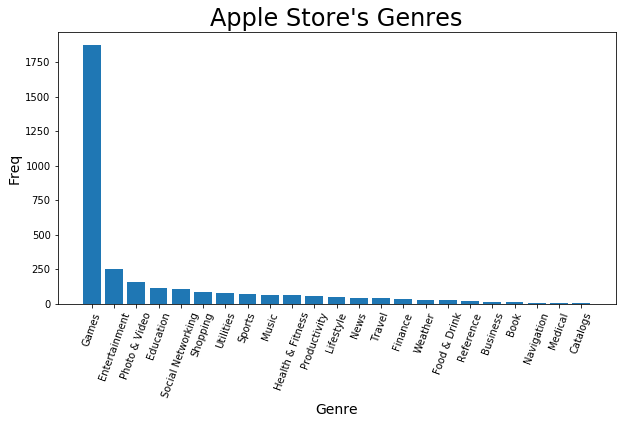

In [140]:
fig, ax = plt.subplots(figsize=(10,5)) 
plt.style.use('fast')
plt.bar(range(len(apple_genre)), [val[0] for val in apple_genre])
plt.xticks(range(len(apple_genre)), [val[1] for val in apple_genre])
plt.xticks(rotation=70)
ax.set_title("Apple Store's Genres", fontsize = 24)
ax.set_xlabel('Genre', fontsize = 14)
ax.set_ylabel('Freq', fontsize = 14)
plt.show()

In [130]:
android_genre = ordered_frequencies(android_genres) #outputs list of (freq, Genre)
android_genre

[(749, 'Tools'),
 (538, 'Entertainment'),
 (474, 'Education'),
 (407, 'Business'),
 (345, 'Productivity'),
 (345, 'Lifestyle'),
 (328, 'Finance'),
 (313, 'Medical'),
 (307, 'Sports'),
 (294, 'Personalization'),
 (287, 'Communication'),
 (275, 'Action'),
 (273, 'Health & Fitness'),
 (261, 'Photography'),
 (248, 'News & Magazines'),
 (236, 'Social'),
 (206, 'Travel & Local'),
 (199, 'Shopping'),
 (190, 'Books & Reference'),
 (181, 'Simulation'),
 (165, 'Dating'),
 (164, 'Arcade'),
 (157, 'Video Players & Editors'),
 (156, 'Casual'),
 (124, 'Maps & Navigation'),
 (110, 'Food & Drink'),
 (100, 'Puzzle'),
 (88, 'Racing'),
 (83, 'Role Playing'),
 (83, 'Libraries & Demo'),
 (82, 'Auto & Vehicles'),
 (80, 'Strategy'),
 (73, 'House & Home'),
 (71, 'Weather'),
 (63, 'Events'),
 (60, 'Adventure'),
 (54, 'Comics'),
 (53, 'Beauty'),
 (53, 'Art & Design'),
 (44, 'Parenting'),
 (40, 'Card'),
 (38, 'Casino'),
 (37, 'Trivia'),
 (35, 'Educational;Education'),
 (34, 'Board'),
 (33, 'Educational'),
 (30, 

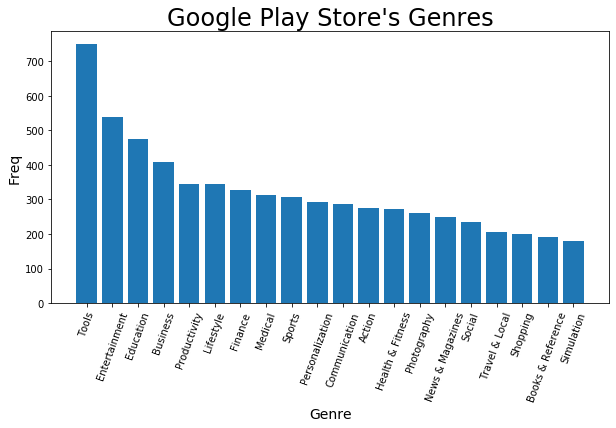

In [138]:
### Only first 20 Genres shown ###

fig, ax = plt.subplots(figsize=(10,5)) 
plt.style.use('fast')
plt.bar(range(len(android_genre[0:20])), [val[0] for val in android_genre[0:20]])
plt.xticks(range(len(android_genre[0:20])), [val[1] for val in android_genre[0:20]])
plt.xticks(rotation=70)
ax.set_title("Google Play Store's Genres", fontsize = 24)
ax.set_xlabel('Genre', fontsize = 14)
ax.set_ylabel('Freq', fontsize = 14)
plt.show()



In [135]:
android_cat = ordered_frequencies(android_category) #outputs list of (freq, Genre)
android_cat

[(1675, 'FAMILY'),
 (862, 'GAME'),
 (750, 'TOOLS'),
 (407, 'BUSINESS'),
 (346, 'LIFESTYLE'),
 (345, 'PRODUCTIVITY'),
 (328, 'FINANCE'),
 (313, 'MEDICAL'),
 (301, 'SPORTS'),
 (294, 'PERSONALIZATION'),
 (287, 'COMMUNICATION'),
 (273, 'HEALTH_AND_FITNESS'),
 (261, 'PHOTOGRAPHY'),
 (248, 'NEWS_AND_MAGAZINES'),
 (236, 'SOCIAL'),
 (207, 'TRAVEL_AND_LOCAL'),
 (199, 'SHOPPING'),
 (190, 'BOOKS_AND_REFERENCE'),
 (165, 'DATING'),
 (159, 'VIDEO_PLAYERS'),
 (124, 'MAPS_AND_NAVIGATION'),
 (110, 'FOOD_AND_DRINK'),
 (103, 'EDUCATION'),
 (85, 'ENTERTAINMENT'),
 (83, 'LIBRARIES_AND_DEMO'),
 (82, 'AUTO_AND_VEHICLES'),
 (73, 'HOUSE_AND_HOME'),
 (71, 'WEATHER'),
 (63, 'EVENTS'),
 (58, 'PARENTING'),
 (57, 'ART_AND_DESIGN'),
 (55, 'COMICS'),
 (53, 'BEAUTY')]

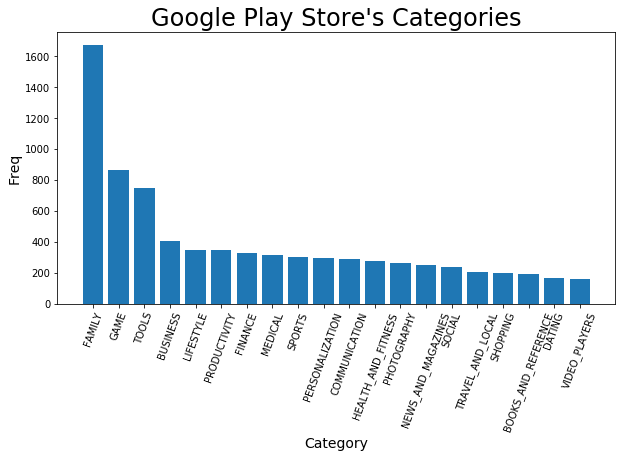

In [139]:
### Only first 20 categories shown ###
fig, ax = plt.subplots(figsize=(10,5)) 
plt.style.use('fast')
plt.bar(range(len(android_cat[0:20])), [val[0] for val in android_cat[0:20]])
plt.xticks(range(len(android_cat[0:20])), [val[1] for val in android_cat[0:20]])
plt.xticks(rotation=70)
ax.set_title("Google Play Store's Categories", fontsize = 24)
ax.set_xlabel('Category', fontsize = 14)
ax.set_ylabel('Freq', fontsize = 14)
plt.show()




For Apple, we see that `Games` is by far the most common genre for free English apps. The top 3 Apps can be classed as 'Fun' as opposed to 'Practical' apps. However, this does not necessarily mean that each Game app is popular, and may have a relatively small number of users compared to an app in the second most common Genre, `Entertainment`.

In contrast to Apple, the top 8 Genres from Google Play Store can be classed as 'Practical'.
However when looking at Google Play Store's `Categories` we see that `Game` is the second most common, around half as common as `Family` which is in first place. Therefore we conclude that Google Play store has a much more balanced distribution between 'Fun' and 'Practical' apps. 

#### Analysing Number of App users
The Android dataset has a column highlighting number of installs, but this is missing for Apple's App Store. Therefore we can use the total number of user ratings as a proxy. We start by calculating the Average number of user ratings per genre for the Apple App Store, so we can identify the most successful apps within each genre. 

#### Possible sources of bias and error
- Intercorrelation is likely between user rating scores and number of installs. Seeing an app have low rating would probably lessen the likelihood that it would be installed by further users, despite marked improvements in the app. 


In [146]:
total_ratings = {}
counter = {}
for row in apple_final:
    tot_rat = int(row[5])
    genre = row[-5]
    
    if genre in total_ratings:
        total_ratings[genre] += tot_rat
        counter[genre] += 1
        
    else:
        total_ratings[genre] = tot_rat
        counter[genre] = 1

In [150]:
average_ratings_ = {}
for genre in counter: 
    average = total_ratings[genre]/counter[genre]
    average_ratings_[genre] = average


In [152]:
average_ratings = ordered_frequencies(average_ratings_)
average_ratings

[(86090.33333333333, 'Navigation'),
 (74942.11111111111, 'Reference'),
 (71548.34905660378, 'Social Networking'),
 (57326.530303030304, 'Music'),
 (52279.892857142855, 'Weather'),
 (39758.5, 'Book'),
 (33333.92307692308, 'Food & Drink'),
 (31467.944444444445, 'Finance'),
 (28441.54375, 'Photo & Video'),
 (28243.8, 'Travel'),
 (26919.690476190477, 'Shopping'),
 (23298.015384615384, 'Health & Fitness'),
 (23008.898550724636, 'Sports'),
 (22788.6696905016, 'Games'),
 (21248.023255813954, 'News'),
 (21028.410714285714, 'Productivity'),
 (18684.456790123455, 'Utilities'),
 (16485.764705882353, 'Lifestyle'),
 (14029.830708661417, 'Entertainment'),
 (7491.117647058823, 'Business'),
 (7003.983050847458, 'Education'),
 (4004.0, 'Catalogs'),
 (612.0, 'Medical')]

We can see that Navigation has the highest average number of ratings of 86090 per app, and medical has the least with just 612 ratings per app. Since Navigation is a tool as opposed to a fun app, this is a good candidate to consider building, since it will likely be popular in both play stores. 

However, we need to consider whether a unique selling point can be established for users to prefer our app over existing ones. 